<a href="https://colab.research.google.com/github/anelglvz/Matematicas_Ciencia_Datos/blob/main/Optimizaci%C3%B3n/GradienteDescendiente_Regresi%C3%B3nLog%C3%ADstica/GradienteDescendiente_Regresi%C3%B3nLog%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Se verá como funciona el algoritmo de Gradiente Descendiente aplicado a una regresión logística que asignará las probabilidades utilizando la función softmax.

# Dependencias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Solo para que al mostrarnos los arreglos no nos de los valores grandes en notación científica
np.set_printoptions(suppress=True)

# Carga de datos e interpretación


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso-Algebra/semana10/pruebas_datos.csv')

In [ ]:
df

,OTR,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,...,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade,type
0,-0.264140,-0.171596,-0.034334,0.173848,-0.051861,-0.194635,-0.103174,-0.493894,0.669772,0.113391,...,0.446317,0.159271,-0.989267,-0.459192,0.414463,-0.068166,2.257305,0.215650,-0.430203,1
1,-0.267371,0.071957,-0.034334,-0.394632,-0.051861,-0.261262,-0.107967,-0.578826,-0.714095,0.478099,...,0.341803,0.053125,-0.989267,0.065955,2.493944,-0.174906,-0.259542,-0.257432,-0.415533,1
2,-0.268571,0.392193,-0.034334,-0.596358,-0.051861,-0.261262,-0.107967,-0.579091,-0.864277,0.449648,...,-0.843156,-0.601191,-0.989267,0.223500,1.925729,-0.174906,-0.350248,-0.257432,-0.351515,1
3,-0.267320,-0.082373,-0.034334,-0.337735,-0.051861,-0.260286,-0.107966,-0.574153,0.401915,-0.240214,...,0.205183,-0.085628,-0.989267,-0.406677,1.394323,-0.174906,-0.056171,-0.257431,-0.430203,1
4,-0.268375,0.094866,-0.034334,-0.551568,-0.051861,-0.261262,-0.107967,-0.579396,-0.876131,-0.003950,...,0.447088,0.160054,-0.989267,0.170985,1.041917,-0.174906,-0.327099,-0.257432,-0.384858,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50577,-0.270438,0.040609,-0.034334,-0.587633,-0.051861,-0.261262,-0.107967,-0.579589,-0.811629,-0.928057,...,-0.499086,-0.800893,-0.989267,-0.039074,2.972986,-0.174905,-0.139995,-0.257431,-0.431537,1
50578,-0.269299,0.040609,-0.034334,-0.704571,-0.051861,-0.261262,-0.107967,-0.573424,-0.873859,-1.356834,...,-0.927494,-1.235990,-0.989267,-0.616736,0.204493,-0.174905,-0.355996,-0.257262,-0.426202,1
50579,-0.270456,0.952123,-0.034334,-0.592510,-0.051861,-0.261262,-0.107967,-0.579500,-0.894274,0.012924,...,0.464365,0.177600,-0.989267,0.276014,1.680116,-0.174905,-0.076802,-0.256689,-0.414199,1
50580,-0.270274,2.659404,-0.034334,-0.648742,-0.051861,-0.261262,-0.107967,-0.579477,-0.886564,-0.241991,...,0.203363,-0.087476,-0.989267,0.748647,1.846925,-0.174905,-0.275480,-0.257133,-0.388859,1


In [ ]:
# Los valores 1 son NON-HFT y los 0 son HFT
df.type.value_counts()

0    30522
1    20060
Name: type, dtype: int64

## Agregando descripción a los datos

Los datos son públicos, fueron utilizados en una competencia que pueden consultar [AQUÍ](https://challengedata.ens.fr/participants/challenges/50/) (para poder ingresar necesitarán registrarse y luego copiar la dirección en su navegador). En esta competencia registraron muchas características de "traders", para tratar de clasificarlos en HFT (High Frequency Traders) o NON-HFT, esto porque es de gran interes tratar de estudiar el impacto que tienen los HFT en los mercados, ya que lo que hacen es realizar intercambios dando ordenes de intercambio a un mecanismo llamado Limit Order Book (LOB), al cual le ordenan realizar compras o ventas a precios que ellos deseen.

## Descripción de las variables
1. NbTradeVenueMic (23) : Número de centros de negociación en los que opera el jugador del mercado

De todos los centros de negociación, estadísticas sobre el número de operaciones observadas por segundo

2. MaxNbTradesBySecond (24)
3. MeanNbTradesBySecond (25)

Estadísticas sobre el delta de tiempo observado entre dos operaciones en la plataforma de negociación TV_1[1]:

4. min_dt_TV1 (26)
5. med_dt_TV1 (28)
6. mean_dt_TV1 (27)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_2:

7. min_dt_TV1_TV2 (29)
8. med_dt_TV1_TV2 (31)
9. mean_dt_TV1_TV2 (30)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_3:

10. min_dt_TV1_TV3 (32)
11. med_dt_TV1_TV3 (34)
12. mean_dt_TV1_TV3 (33)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_4 :

13. min_dt_TV1_TV4 (35)
14. med_dt_TV1_TV4 (37)
15. mean_dt_TV1_TV4(36)

De todos los centros de negociación, número de segundos durante el día de negociación donde se observa al menos una operación del jugador del mercado i

16. NbSecondWithAtLeatOneTrade(38)

En la plataforma de negociación TV_1, tres proporciones entre el número de todo tipo de eventos[2] enviados a la LOB y:

17. el número de operaciones (OTR) (4)
18. el número de eventos de tipo cancelación (OCR) (5)
19. el número de eventos de tipo de modificación (OMR) (6)

En el centro de negociación TV_1, estadísticas durante el delta de tiempo observado entre dos eventos de todo tipo enviados:

20. min_time_two_events (7)
21. mean_time_two_events (8)
22. 10_p_time_two_events (9)
23. med_time_two_events (10)
24. 25_p_time_two_events (11)
25. 75_p_time_two_events (12)
26. 90_p_time_two_events (13)
27. max_time_two_events (14)

En la plataforma de negociación TV_1, estadísticas a lo largo de la vida útil observada de las órdenes canceladas:

28. min_lifetime_cancel (15)
29. mean_lifetime_cancel (16)
30. 10_p_lifetime_cancel (17)
31. med_lifetime_cancel (18)
32. 25_p_lifetime_cancel (19)
33. 75_p_lifetime_cancel (20)
34. 90_p_lifetime_cancel (21)
35. max_lifetime_cancel (22)

Extra variables

36. Type: HF, Non HFT (39)
37. Day
38. Share
39. Trader
40. Index


In [ ]:
df.shape

(50582, 26)

In [ ]:
X_prob = np.array(df.drop(['type'], axis=1))
X_prob

array([[-0.26413997, -0.17159563, -0.03433358, ...,  2.25730527,
         0.21564981, -0.43020348],
       [-0.26737141,  0.07195718, -0.03433358, ..., -0.25954205,
        -0.25743172, -0.41553282],
       [-0.26857105,  0.39219296, -0.03433358, ..., -0.35024783,
        -0.25743176, -0.35151541],
       ...,
       [-0.27045626,  0.9521233 , -0.03433358, ..., -0.07680184,
        -0.25668942, -0.41419912],
       [-0.27027382,  2.65940442, -0.03433358, ..., -0.27547952,
        -0.25713323, -0.3888589 ],
       [-0.2702773 ,  0.66275362, -0.03433358, ...,  0.28933079,
        -0.25311955, -0.423535  ]])

In [ ]:
X_prob.shape

(50582, 25)

In [ ]:
Y_prob = np.array(df['type'])
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
Y_prob.shape

(50582,)

In [ ]:
num_inputs = 25
num_outputs = 2

W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [ ]:
print(W)
print(B)

[[-0.14701994 -0.04094986]
 [-0.00885756  0.08398238]
 [-0.15002119  0.0297695 ]
 [ 0.05006163  0.06141401]
 [ 0.04647521 -0.06248618]
 [ 0.05506294 -0.06582476]
 [ 0.11142613 -0.06349265]
 [ 0.00753087  0.0034958 ]
 [-0.04162694  0.10996812]
 [ 0.06187859  0.01112487]
 [ 0.08750414 -0.17718447]
 [-0.02432434  0.02149761]
 [-0.09734177  0.01578014]
 [-0.00504711 -0.0853355 ]
 [ 0.0550418  -0.08433614]
 [ 0.00050792 -0.13852381]
 [ 0.22564523  0.05124701]
 [ 0.01607887  0.16984546]
 [ 0.11051054  0.00108678]
 [-0.03162346  0.0663226 ]
 [-0.04365418  0.12275587]
 [-0.12234298 -0.00855457]
 [ 0.01357022 -0.11111163]
 [-0.03892005  0.0344927 ]
 [ 0.10311242 -0.09961015]]
[0. 0.]


# Definición de la operación SoftMax

Primero, notemos que dado un arreglo de numpy, nosotros podemos relizar sumas de diferentes formas utilizando el método "sum()". Al daro distintos argumentos se reliza de distintos modos.

Si no pasamos ningún parámetro a "sum()", lo que obtendremos será la suma de todas las entradas de nuestra matriz (o arreglo o tensor).

Si damos como parámetro el "0", lo que nos regresará será la suma por columnas (es decir, en el eje 0)

Si damos como parámetro el "1", nos regresará la suma por filas (es decir, en el eje 1)

In [ ]:
X = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
X.sum(keepdims=True), X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(array([[21.]]),
 array([[5., 7., 9.]]),
 array([[ 6.],
        [15.]]))

Con esto podemos implementar de modo muy sencillo la función SoftMax, que consiste de 3 pasos:

1. Obtener el exponenete de cda uno de nuestros elementos.
2. Tomamos la suma de los elementos de su fila
3. Dividimos cada fila por su constante de normalización (sería una suma de exponenciales)

La expresión matemática de la función SoftMax es la siguiente:


$$ \mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}. $$

In [ ]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

Veamos un ejemplo con la matriz de 2X3 creada anteriormente.

In [ ]:
# 4 clases
W_p_X = np.random.normal(0, 0.1, (3, 4)) # Jugaremos con este parametro
B_p_X = np.zeros(4) # Jugaremos con este parametro

In [ ]:
X @ W_p_X + B_p_X

array([[-0.07458081,  0.47518583, -0.24548083,  0.87470287],
       [-0.3731358 ,  1.1553399 , -0.02663742,  2.12053343]])

In [ ]:
softmax(X @ W_p_X + B_p_X)

array([[0.16234787, 0.28132428, 0.13684397, 0.41948387],
       [0.05227156, 0.24103161, 0.07391759, 0.63277925]])

Si observan con cuidado, pueden ver que con esta operación estamos transformando todas nuestras entradas en números positivos. Mas aún, cada fila suma 1, es decir, la convertimos en una distribución de probabilidad.

In [ ]:
x_prob = softmax(X @ W_p_X + B_p_X)
x_prob, x_prob.sum(1)

(array([[0.16234787, 0.28132428, 0.13684397, 0.41948387],
        [0.05227156, 0.24103161, 0.07391759, 0.63277925]]),
 array([1., 1.]))

# Definiendo el modelo

Aquí pueden ver que tipo de modelo vamos a implementar. En este caso es una regresión softmax.

In [ ]:
def net(X,W,b):
    return softmax(np.dot(X.reshape((-1, W.shape[0])), W) + b)

1. ¿Que nos dará como salida ésta operación?

2. ¿Porqué?

# Definiendo la función de perdida

Usaremos la función Cross-Entropy, una de las mas populares dado que es buena para problemas de clasficación y en la actualidad, en machine learning son mas los problemas de clasificación que los de regresión.

La función es la siguiente:
$$ -\sum_{c=1}^My_{o,c}\log(p_{o,c}), $$

donde $M$ es la cantidad de clases que tenemos, $log$ la función de logaritmo natural, $y$ es $0$ o $1$ dependiendo de la etiqueta real de la clase $c$ y por último $p_{o,c}$ es la probabilidad predicha de que la observación $o$ pertenezca a la clase $c$.

Para calcular esto, en lugar de utilizar un ciclo "for" (que a veces termina siendo menos optimizado), utilizaremos funciones de numpy.

In [ ]:
def cross_entropy(y_hat, y):
    return np.sum(- np.log(y_hat[range(len(y_hat)), y])) / y.shape[0]

In [ ]:
# El resultado final es lo que alimentará a la cross-entropy, es decir etiqueta
# de que pertenece a la clase 1 por la probabilidad de pertenecer a la clase 1
y = np.array([0, 2])
y_hat = np.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

array([0.1, 0.5])

In [ ]:
cross_entropy(y_hat, y)

1.4978661367769954

# Precisión de la clasificación

En un problema de clasificación multi-clase, es decir, un problema en el que observemos varias caracteristicas de un elemento y decidamos a que clase pertenece dicho elemento.

Por ejemplo: Un algoritmo de clasificación de imagenes que intente saber si algo es un perro, un gato o un ratón. Si introdujeramos características y al final diera un vector $(0.2, 0.38, 0.42)$, el algoritmo lo clasificaría como un ratón (lo marcaría como perteneciente a la tercer clase)

Cuando las predicciones son consistentes con las etiquetas verdaderas, decimos que son correctas. La presición de la clasificación son la cantidad de predicciones correctas entre todas las predicciones. Sin embargo, es muy difícil optimizar esto directamente (no es una función diferenciable), pero será muy importante para ver el rendimiento de nuestro modelo.

Lo que hacemos para ver la precisión es encontrar el valor mas grande en el vector de probabilidades, convertirlo en entero (porque muy probablemente sea un valor entr 0 y 1) y compararlo con las etiquetas verdaderas de nuestros datos.

In [ ]:
# ARGMAX regresa la posicion del elemento con mayor valor
np.array([[0.2,0.38, 0.42]]).argmax(axis=1)

array([2])

In [ ]:
def accuracy(y_hat, y):
    """Calcula la cantidad de predicciones correctas."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.astype(y.dtype) == y
    return float(cmp.astype(y.dtype).sum())/ len(y)

In [ ]:
accuracy(y_hat, y)

0.5

## Veamos como sería el accuracy para nuestro modelo con pesos al azar

In [ ]:
X_prob

array([[-0.26413997, -0.17159563, -0.03433358, ...,  2.25730527,
         0.21564981, -0.43020348],
       [-0.26737141,  0.07195718, -0.03433358, ..., -0.25954205,
        -0.25743172, -0.41553282],
       [-0.26857105,  0.39219296, -0.03433358, ..., -0.35024783,
        -0.25743176, -0.35151541],
       ...,
       [-0.27045626,  0.9521233 , -0.03433358, ..., -0.07680184,
        -0.25668942, -0.41419912],
       [-0.27027382,  2.65940442, -0.03433358, ..., -0.27547952,
        -0.25713323, -0.3888589 ],
       [-0.2702773 ,  0.66275362, -0.03433358, ...,  0.28933079,
        -0.25311955, -0.423535  ]])

In [ ]:
accuracy(net(X_prob, W, B),Y_prob)

0.40294966588905146

In [ ]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [ ]:
# Las probabilidades que predecimos para cada fila de nuestros datos
net(X_prob, W, B)

array([[0.74792146, 0.25207854],
       [0.30861018, 0.69138982],
       [0.29965494, 0.70034506],
       ...,
       [0.267211  , 0.732789  ],
       [0.25133541, 0.74866459],
       [0.45924477, 0.54075523]])

In [ ]:
# La etiqueta verdadera de nuestros datos
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

# SoftMax Estable


In [ ]:
# El resultado final es lo que alimentará a la cross-entropy, es decir etiqueta
# de que pertenece a la clase 1 por la probabilidad de pertenecer a la clase 1
y = np.array([0, 2])
y_hat = np.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

array([0.1, 0.5])

In [ ]:
# Función softmax (Repetida de arriba solo para ejemplificar)
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [ ]:
# Softmax Estable
def stable_softmax(X):
    X_exp = np.exp(X - np.max(X, axis=1, keepdims=True))
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [ ]:
def net_s(X,W,b):
    return stable_softmax(np.dot(X.reshape((-1, W.shape[0])), W) + b)

# Demostración de SoftMax estable

In [ ]:
prueba = np.array([[99999, 99995, 99993],[9, 5, 3]])

In [ ]:
softmax(prueba)

<ipython-input-42-edb56ab81491>:3: RuntimeWarning: overflow encountered in exp
  X_exp = np.exp(X)
<ipython-input-42-edb56ab81491>:5: RuntimeWarning: invalid value encountered in true_divide
  return X_exp / partition


array([[       nan,        nan,        nan],
       [0.97962921, 0.01794253, 0.00242826]])

In [ ]:
stable_softmax(prueba)

array([[0.97962921, 0.01794253, 0.00242826],
       [0.97962921, 0.01794253, 0.00242826]])

In [ ]:
# Si está repetida, es solo para recordar su estructura
def cross_entropy(y_hat, y):
    return np.sum(- np.log(y_hat[range(len(y_hat)), y])) / y.shape[0]

In [ ]:
cross_entropy(y_hat, y)

1.4978661367769954

¿Como seria el gradiente de mi función compuesta?

Sea
$$z_i = b + ω_1*x_1+ \ldots + \omega_k * x_k $$
para mis datos i-esimos $\{ x_1,\ldots,x_k\} \in X$. Tenemos que
$$ \frac{\partial L}{\partial ω} = \frac{\partial L}{\partial z} \frac{∂ z}{\partial \omega} $$
así
$$ \require{cancel}
\begin{align}
\frac{dL}{dz_i} &= \frac{d}{dz_i} \bigg[  – \sum_{k=1}^c y_k log (a_k) \bigg] \\
&= – \sum_{k=1}^c y_k \frac{d \big( log (a_k) \big)}{dz_i} \\
&= – \sum_{k=1}^c y_k \frac{d \big( log (a_k) \big)}{da_k} . \frac{da_k}{dz_i} \\
&= – \sum_{k=1}^c\frac{y_k}{a_k} . \frac{da_k}{dz_i} \\
&= – \bigg[ \frac{y_i}{a_i} . \frac{da_i}{dz_i}  + \sum_{k=1, k \not=i}^c \frac{y_k}{a_k}  \frac{da_k}{dz_i} \bigg] \\
&= – \frac{y_i}{\cancel{a_i}} . \cancel{a_i}(1-a_i) \text{ } – \sum_{k=1, k \not=i}^c \frac{y_k}{\cancel{a_k}} . (\cancel{a_k}a_i) \\
&= – y_i +y_ia_i + \sum_{k=1, k \not=i}^c y_ka_i \\
&= a_i \big( y_i + \sum_{k=1, k \not=i}^c y_k \big) – y_i \\
&= a_i + \sum_{k=1}^c y_k -y_i \\
&= a_i . 1 – y_i \text{ , since } \sum_{k=1}^c y_k =1 \\
&= a_i – y_i
\end{align} $$
además
$$ \frac{\partial z_i}{\partial \omega_i} = x_i $$

In [ ]:
def grad_softmax_cross_entropy_for_w(X, y_true, w, b):
    netaux = net_s(X,w,b)

    ones_true_class = np.zeros_like(netaux) # Matriz de ceros que tiene la forma de las probabilidades (logits.shape), si alimento todos los datos es 50000X2

    ones_true_class[np.arange(len(netaux)),y_true] = 1 # Genera 1 o cero si esta en la clasificacion correcta

    softmax_ = netaux # softmax aplicado a mis probabilidades

    aux1 = softmax_ - ones_true_class

    return X.T @ aux1/X.shape[0]

In [ ]:
def grad_softmax_cross_entropy_for_b(X, y_true, w, b):
    netaux = net_s(X,w,b)

    ones_true_class = np.zeros_like(netaux) # Matriz de ceros que tiene la forma de las probabilidades (logits.shape), si alimento todos los datos es 50000X2

    ones_true_class[np.arange(len(netaux)),y_true] = 1 # Genera 1 o cero si esta en la clasificacion correcta

    softmax_ = netaux # softmax aplicado a mis probabilidades

    aux1 = softmax_ - ones_true_class

    return aux1.sum(axis=0, keepdims=True)/X.shape[0]

Ahora podemos implementar Gradient Descent

In [ ]:
def gradient_descent(x, y, w, b, net, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []

	for _ in range(num_epochs):
		y_probs = net_s(x, w, b)
		y_hat = y_probs.argmax(axis=1)

		gradient_w = grad_softmax_cross_entropy_for_w(x,y,w,b)
		gradient_b = grad_softmax_cross_entropy_for_b(x,y,w,b)

	 #Actualización de los parámetros
		w = w - (learning_rate)*gradient_w
		b = b - (learning_rate)*gradient_b

		J_all.append(cross_entropy(y_probs, y))

	return J_all, w, b

In [ ]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [ ]:
learning_rate = 0.01
num_epochs = 1000

In [ ]:
J_all, W, B = gradient_descent(X_prob, Y_prob, W, B, net, learning_rate, num_epochs)
Y_hat = net(X_prob, W, B)
J = cross_entropy(Y_hat, Y_prob)
print("Cost: ", J)
print("Parameters: ", W)
print("Intercepto: ", B)

Cost:  0.24521519613811377
Parameters:  [[ 0.22786768 -0.30761128]
 [-0.01338495  0.07010689]
 [-0.00496571  0.05560423]
 [-0.08604168  0.16192671]
 [-0.11054185 -0.03367718]
 [ 0.04048813 -0.07022645]
 [-0.14257807  0.01757742]
 [ 0.05306334 -0.17260838]
 [ 0.06535131  0.109001  ]
 [-0.30545414  0.48469584]
 [-0.25150381  0.13750209]
 [-0.101451    0.02030017]
 [-0.08026472  0.08564301]
 [ 0.19541269 -0.11776034]
 [ 0.07139129 -0.13262994]
 [-0.02759201 -0.08138656]
 [-0.19926657  0.03128378]
 [ 0.06206418  0.1195068 ]
 [ 0.83273995 -0.93060986]
 [-0.08262976 -0.0614814 ]
 [-0.02427434 -0.08175861]
 [ 0.01722933  0.00322149]
 [ 0.13915634  0.12024048]
 [ 0.02018462 -0.02417518]
 [ 0.04546876 -0.04810749]]
Intercepto:  [[ 0.39562701 -0.39562701]]


In [ ]:
print(J_all)

[0.607920314004663, 0.5999614904160738, 0.5924944201066237, 0.5854808534462348, 0.5788856484195732, 0.5726765539453762, 0.5668239942413671, 0.5613008591887416, 0.5560823039734497, 0.551145560013999, 0.5464697582513396, 0.542035765205554, 0.5378260317362312, 0.5338244541287596, 0.5300162469275543, 0.5263878268184754, 0.5229267068026986, 0.5196213998853129, 0.5164613315107479, 0.5134367600041794, 0.510538704316383, 0.5077588784141877, 0.5050896317062833, 0.5025238949423227, 0.500055131070433, 0.49767729058346205, 0.495384770926898, 0.4931723795811042, 0.49103530046720606, 0.4889690633596164, 0.48696951601892924, 0.4850327987868489, 0.48315532141015854, 0.481333741883644, 0.4795649471225702, 0.4778460352939517, 0.4761742996526496, 0.47454721374343617, 0.4729624178437506, 0.4714177065340929, 0.4699110172939799, 0.46844042003125547, 0.46700410746142834, 0.46560038626167916, 0.4642276689313615, 0.4628844662972741, 0.4615693806077847, 0.4602810991651251, 0.45901838844988346, 0.457780088695962

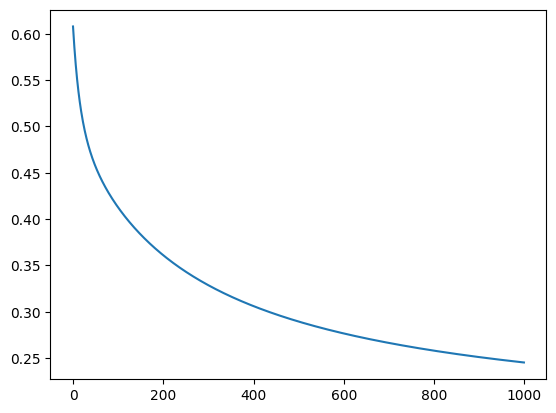

In [ ]:
perdida_por_epoca = np.array(J_all).reshape(-1,1)
plt.plot(perdida_por_epoca)
plt.show()

In [ ]:
# Las probabilidades que predecimos para cada fila de nuestros datos
net(X_prob, W, B)

array([[0.18683067, 0.81316933],
       [0.17455308, 0.82544692],
       [0.23215176, 0.76784824],
       ...,
       [0.124426  , 0.875574  ],
       [0.15750406, 0.84249594],
       [0.56414283, 0.43585717]])

In [ ]:
# La etiqueta verdadera de nuestros datos
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
accuracy(net(X_prob, W, B),Y_prob)

0.9166699616464354

# SGD: Stochastic Gradient Descent

En este caso, el algoritmo entrenara de modo un poco distinto, tomando muestras al azar de mis datos, dicha muestra será del tamaño que yo la pida.

In [ ]:
batch_size = 200

In [ ]:
number_of_rows = X_prob.shape[0]  # En nuestro caso, son 50,000
random_indices = np.random.choice(number_of_rows, size=batch_size, replace=False)
X_prima = X_prob[random_indices, :].copy()

In [ ]:
X_prima

array([[-0.26132605,  0.04543163, -0.03433358, ..., -0.3853923 ,
        -0.2533609 ,  0.5353925 ],
       [-0.23858466, -0.25343491, -0.03433358, ..., -0.37803653,
        -0.24925631,  0.04859342],
       [ 0.06756482, -0.26227517, -0.03433358, ..., -0.38076577,
        -0.25391315,  0.06193038],
       ...,
       [-0.26389351, -0.12457306, -0.03433358, ..., -0.38171568,
        -0.25326385,  0.39135332],
       [-0.25318931,  0.05714421, -0.03433358, ..., -0.23231955,
        -0.16348827, -0.36618606],
       [-0.25304908, -0.23067528, -0.03433358, ..., -0.3953675 ,
        -0.25743198, -0.43420456]])

In [ ]:
Y_prima = Y_prob[random_indices].copy()

In [ ]:
Y_prima

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0])

In [ ]:
def batch_gradient_descent(x, y, w, b, net, batch_size, learning_rate=0.1, num_epochs=10):
  m = x.shape[0]
  J_all = []

  for _ in range(num_epochs):
    random_indices = np.random.choice(m, size=batch_size, replace=False)
    x_batch = x[random_indices, :].copy()
    y_batch = y[random_indices].copy()

    y_probs = net_s(x_batch, w, b)
    #y_hat = y_probs.argmax(axis=1)

    gradient_w = grad_softmax_cross_entropy_for_w(x_batch,y_batch,w,b)
    gradient_b = grad_softmax_cross_entropy_for_b(x_batch,y_batch,w,b)

    #Actualizamos los paramentros
    w = w - (learning_rate)*gradient_w
    b = b - (learning_rate)*gradient_b

    J_all.append(cross_entropy(y_probs, y_batch))

  return J_all, w, b

In [ ]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [ ]:
learning_rate = 0.01
num_epochs = 1000

In [ ]:
J_all, W, B = batch_gradient_descent(X_prob, Y_prob, W, B, net, batch_size, learning_rate, num_epochs)
Y_hat = net(X_prob, W, B)
J = cross_entropy(Y_hat, Y_prob)
print("Cost: ", J)
print("Parameters: ", W)
print("Intercepto: ", B)

Cost:  0.24699192508028464
Parameters:  [[ 0.36792775 -0.11418736]
 [-0.00260185  0.08088264]
 [-0.02202015  0.08638321]
 [-0.16875288  0.14694031]
 [-0.04349239  0.14393833]
 [ 0.03964508 -0.07411707]
 [-0.00619895  0.08669318]
 [ 0.21674074 -0.09639134]
 [-0.09319954 -0.02112607]
 [-0.33342868  0.39109991]
 [-0.10404543  0.13604017]
 [-0.14528143 -0.08272081]
 [-0.01868538  0.17235437]
 [ 0.10761031 -0.12440231]
 [ 0.0919415  -0.05112602]
 [-0.07727264 -0.01620426]
 [-0.05993008  0.07100935]
 [ 0.01767912  0.06489971]
 [ 0.92839595 -0.81751302]
 [ 0.0407989   0.17228846]
 [ 0.02318545 -0.06559132]
 [ 0.1803565  -0.04602344]
 [-0.0274646   0.02379493]
 [-0.06048355  0.04252887]
 [ 0.00892161 -0.17266957]]
Intercepto:  [[ 0.40247672 -0.40247672]]


In [ ]:
print(J_all)

[1.0537248174465728, 1.0839307629731212, 1.0803376225519958, 1.0227489249988428, 0.9904257499358604, 0.9532362990977071, 0.9119247443733627, 0.8907588434466414, 0.8454060405864888, 0.8184507740312671, 0.8340394224543011, 0.8274637501865381, 0.7978853599008766, 0.7552812140772974, 0.7813015011045068, 0.7286971903398731, 0.7344619424037291, 0.72641536339293, 0.7190000045693773, 0.6982376839253905, 0.7122923656237055, 0.680230326625233, 0.6687477024884305, 0.6492480977275352, 0.6674700711642815, 0.6316168330493014, 0.6408961431888335, 0.6092651363293233, 0.6189643526156163, 0.6358410804504753, 0.6053696806071313, 0.6063987833052105, 0.611754686527152, 0.592632338718132, 0.6026461044004141, 0.6038255840495469, 0.5851375335261255, 0.5536146282787058, 0.5610932111274122, 0.610556480323154, 0.5621467240044855, 0.5432003403675751, 0.5416400022976678, 0.5291171942977753, 0.5550526639259391, 0.5542103444807248, 0.5294980104994653, 0.5575640308617847, 0.5166857725308168, 0.5202618113728117, 0.543

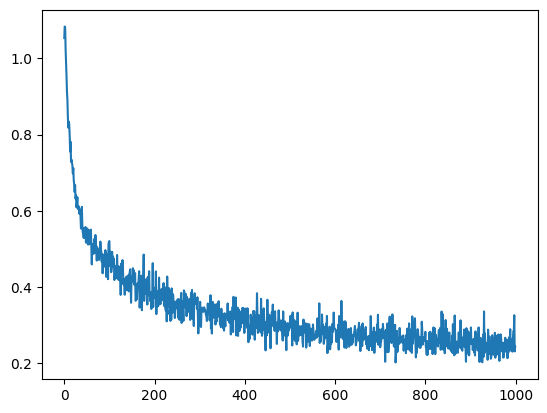

In [ ]:
perdida_por_epoca = np.array(J_all).reshape(-1,1)
plt.plot(perdida_por_epoca)
plt.show()

In [ ]:
# Las probabilidades que predecimos para cada fila de nuestros datos
net(X_prob, W, B)

array([[0.15693163, 0.84306837],
       [0.21453157, 0.78546843],
       [0.25298833, 0.74701167],
       ...,
       [0.14573211, 0.85426789],
       [0.17266361, 0.82733639],
       [0.54168603, 0.45831397]])

In [ ]:
# La etiqueta verdadera de nuestros datos
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
accuracy(net(X_prob, W, B),Y_prob)

0.9178759242418252